<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  7645 non-null   int64 
 1   rodada              7645 non-null   int64 
 2   data                7645 non-null   object
 3   hora                7645 non-null   object
 4   dia                 7645 non-null   object
 5   mandante            7645 non-null   object
 6   visitante           7645 non-null   object
 7   formacao_mandante   2671 non-null   object
 8   formacao_visitante  2671 non-null   object
 9   tecnico_mandante    3035 non-null   object
 10  tecnico_visitante   3035 non-null   object
 11  vencedor            7645 non-null   object
 12  arena               7645 non-null   object
 13  mandante_placar     7645 non-null   int64 
 14  visitante_placar    7645 non-null   int64 
 15  mandante_estado     7645 non-null   object
 16  visitante_estado    7645

C:\Users\patho\AppData\Local\Temp\ipykernel_4556\2166433451.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["tecnico_visitante"].fillna("Desconhecido", inplace=True)
C:\Users\patho\AppData\Local\Temp\ipykernel_4556\2166433451.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Arquivo exportado para: processed_brasileirao.csv
Datas convertidas. Colunas adicionadas: 'ano', 'mes'.

Top 10 times por vitórias:
        vencedor  vitorias
0      Sao Paulo       338
1       Flamengo       317
2         Santos       317
3  Internacional       304
4    Corinthians       296
5         Gremio       295
6       Cruzeiro       293
7    Atletico-MG       293
8      Palmeiras       286
9     Fluminense       285

[Aviso] Não encontrei coluna de estado do mandante. Colunas disponíveis:
['ID', 'ano', 'arena', 'data', 'dia', 'estado_vencedor', 'formacao_mandante', 'formacao_visitante', 'hora', 'mandante', 'mandante_estado_BA', 'mandante_estado_CE', 'mandante_estado_DF', 'mandante_estado_GO', 'mandante_estado_MG', 'mandante_estado_MT', 'mandante_estado_PA', 'mandante_estado_PE', 'mandante_estado_PR', 'mandante_estado_RJ', 'mandante_estado_RN', 'mandante_estado_RS', 'mandante_estado_SC', 'mandante_estado_SP', 'mandante_placar', 'mandante_placar_norm', 'mes', 'outlier', 'rodada'

C:\Users\patho\AppData\Local\Temp\ipykernel_4556\2166433451.py:131: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["data"] = pd.to_datetime(df["data"], errors="coerce", dayfirst=True)


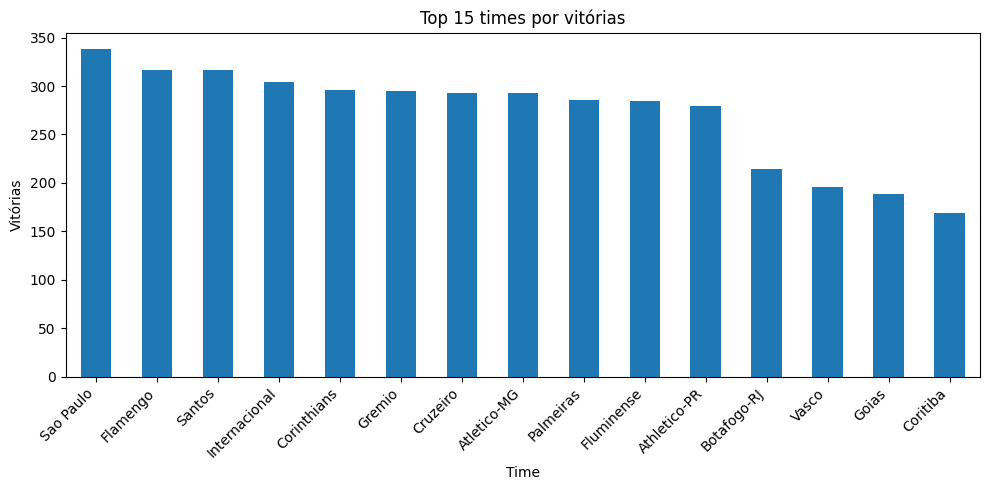

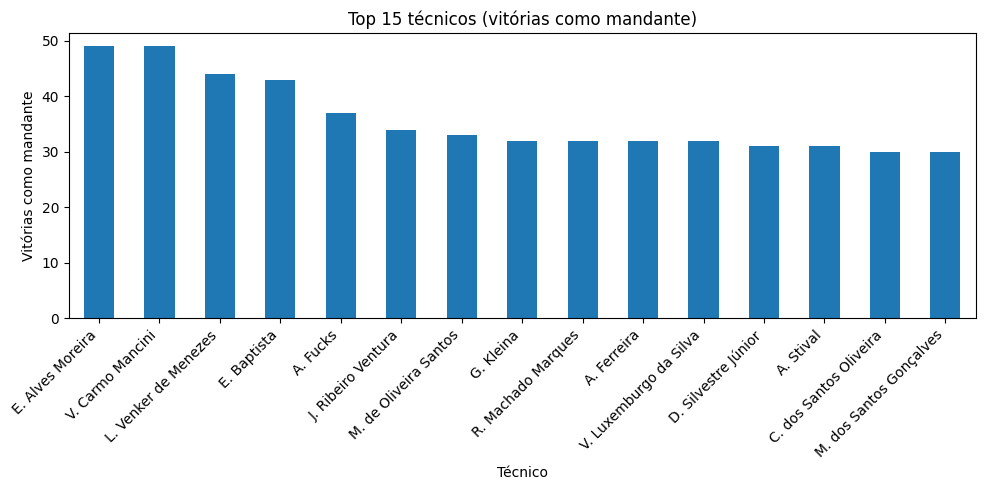

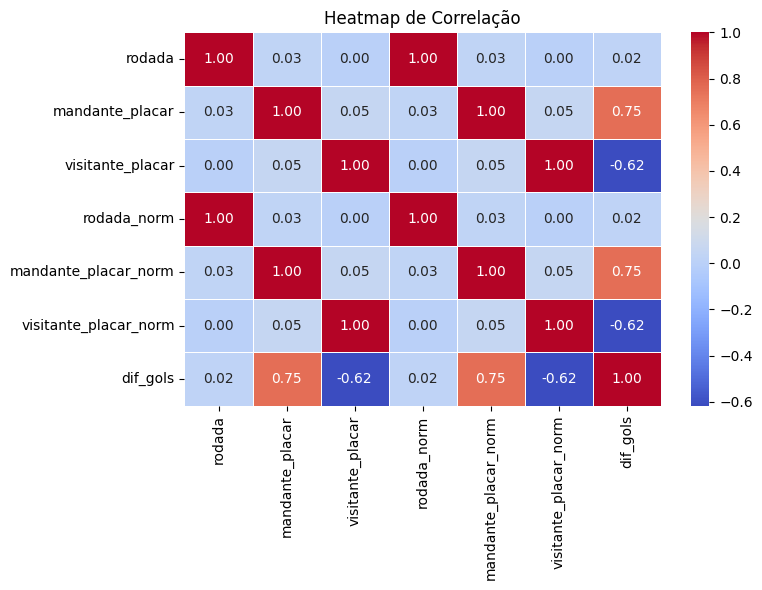

In [1]:
# Imports Necessarios 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Le o arquivo csv
df = pd.read_csv("campeonato-brasileiro-full.csv")

# primeiras linhas do df
df.head()

# info do df
df.info()

# Numero de linhas e colunas
print("\n shape:",df.shape)

#Tipos de dados
print("\n tipos de dados")
print(df.dtypes)

#contagem de nulls
print("\n soma dos valores nulos por coluna")
print (df.isnull().sum())

# retorna descrições estatisticas basicas (media por exemplo)
df.describe()

null_count = df.isnull().sum()
null_pct = (df.isnull().mean() * 100).round(2)

null_report = (
    pd.DataFrame({"nulos": null_count, "null %": null_pct})
    .sort_values(by="nulos", ascending=False)
)

null_report

# Remover todas as linhas que tenham nulos
df_sem_nulos = df.dropna()

# Preencher nulos de uma coluna específica com um valor fixo
df["tecnico_visitante"].fillna("Desconhecido", inplace=True)

# Preencher nulos de colunas numéricas com a média
df["mandante_placar"].fillna(df["mandante_placar"].mean(), inplace=True)

# Preencher nulos com o valor mais frequente (moda)
df["formacao_mandante"].fillna(df["formacao_mandante"].mode()[0], inplace=True)

cols_categoricas = ["tecnico_visitante", "formacao_mandante"]
df[cols_categoricas] = df[cols_categoricas].fillna("Desconhecido")

# Z-Score dos placares
z_mandante = stats.zscore(df["mandante_placar"])
z_visitante = stats.zscore(df["visitante_placar"])

# Critério: |z| > 3 é outlier
outliers = df[(abs(z_mandante) > 3) | (abs(z_visitante) > 3)]

outliers[["mandante", "visitante", "mandante_placar", "visitante_placar"]]

# Marca os outliers com True/False
z_mandante = stats.zscore(df["mandante_placar"])
z_visitante = stats.zscore(df["visitante_placar"])

df["outlier"] = (abs(z_mandante) > 3) | (abs(z_visitante) > 3)

# Conferindo quantos jogos foram marcados como outliers
print("Jogos outliers:", df["outlier"].sum())

cols_to_norm = ["rodada", "mandante_placar", "visitante_placar"]

for col in cols_to_norm:
    df[f"{col}_norm"] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Conferindo as novas colunas
df[[col for col in df.columns if "_norm" in col]].head()

# Garantir que não há NaN nas colunas categóricas escolhidas
cat_cols = ["mandante_estado", "visitante_estado", "vencedor"]
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].fillna("Desconhecido")

# Aplicar One-Hot Encoding e sobrescrever o df original
antes = df.shape
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
depois = df.shape

print("Shape antes:", antes, "| depois:", depois)
df.head()

# Selecionar apenas as colunas numéricas
num_df = df.select_dtypes(include=[np.number])

# Matriz de correlação
corr_matrix = num_df.corr()

# Visualizar só algumas colunas de interesse
cols_focus = ["rodada", "mandante_placar", "visitante_placar", "rodada_norm", "mandante_placar_norm", "visitante_placar_norm"]
corr_focus = corr_matrix.loc[cols_focus, cols_focus]

print(corr_focus)

# Criar coluna 'vencedor' (quem venceu ou Empate)
def define_vencedor(row):
    if row["mandante_placar"] > row["visitante_placar"]:
        return row["mandante"]
    elif row["visitante_placar"] > row["mandante_placar"]:
        return row["visitante"]
    else:
        return "Empate"

df["vencedor"] = df.apply(define_vencedor, axis=1)

# Filtragem de dados (ex.: jogos do Flamengo como mandante)
flamengo_casa = df[df["mandante"].str.contains("Flamengo", case=False, na=False)].copy()
print("Jogos do Flamengo como mandante:", flamengo_casa.shape[0])
print(flamengo_casa[["data", "mandante", "visitante", "mandante_placar", "visitante_placar"]].head())

# Exportação do DataFrame processado para CSV 
output_path = "processed_brasileirao.csv"
df.to_csv(output_path, index=False, encoding="utf-8")
print(f"Arquivo exportado para: {output_path}")

# Conversão de datas e extração de ano/mês 
if "data" in df.columns:
    df["data"] = pd.to_datetime(df["data"], errors="coerce", dayfirst=True)
    df["ano"]  = df["data"].dt.year
    df["mes"]  = df["data"].dt.month
    print("Datas convertidas. Colunas adicionadas: 'ano', 'mes'.")

# Agrupamentos robustos (vitórias por time e por estado se existir)
# Vitórias por time vencedor (ignorando empates)
vitorias_por_time = (
    df[df["vencedor"] != "Empate"]
    .groupby("vencedor")
    .size()
    .sort_values(ascending=False)
    .rename("vitorias")
    .reset_index()
)
print("\nTop 10 times por vitórias:")
print(vitorias_por_time.head(10))

# Tentar detectar automaticamente o nome da coluna de estado do mandante
possible_state_cols = [
    "mandante_estado", "estado_mandante", "mandante_uf", "uf_mandante",
    "home_state", "estado_casa"
]
mandante_estado_col = next((c for c in possible_state_cols if c in df.columns), None)

if mandante_estado_col is not None:
    mandante_venceu = df["vencedor"] == df["mandante"]
    vitorias_por_estado_mandante = (
        df[mandante_venceu]
        .groupby(mandante_estado_col, dropna=False)
        .size()
        .sort_values(ascending=False)
        .rename("vitorias_mandante")
        .reset_index()
    )
    print(f"\nVitórias do mandante por estado (Top 10) usando '{mandante_estado_col}':")
    print(vitorias_por_estado_mandante.head(10))
else:
    print("\n[Aviso] Não encontrei coluna de estado do mandante. Colunas disponíveis:")
    print(sorted(df.columns.tolist()))

# Coluna derivada: diferença de gols
df["dif_gols"] = df["mandante_placar"] - df["visitante_placar"]
print("\nColuna 'dif_gols' criada.")

# Gráfico de barras (Top times em vitórias)
import matplotlib.pyplot as plt

top_n = 15
vitorias_top = (
    df[df["vencedor"] != "Empate"]
    .groupby("vencedor")
    .size()
    .sort_values(ascending=False)
    .head(top_n)
)

plt.figure(figsize=(10, 5))
vitorias_top.plot(kind="bar")
plt.title(f"Top {top_n} times por vitórias")
plt.xlabel("Time")
plt.ylabel("Vitórias")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

if "tecnico_mandante" in df.columns:
    vitorias_por_tecnico = (
        df[df["vencedor"] == df["mandante"]]
        .groupby("tecnico_mandante")
        .size()
        .sort_values(ascending=False)
        .head(top_n)
    )
    if not vitorias_por_tecnico.empty:
        plt.figure(figsize=(10, 5))
        vitorias_por_tecnico.plot(kind="bar")
        plt.title(f"Top {top_n} técnicos (vitórias como mandante)")
        plt.xlabel("Técnico")
        plt.ylabel("Vitórias como mandante")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

# Heatmap da correlação
import seaborn as sns
import numpy as np

num_df = df.select_dtypes(include=[np.number]).copy()
cols_focus = [c for c in [
    "rodada", "mandante_placar", "visitante_placar",
    "rodada_norm", "mandante_placar_norm", "visitante_placar_norm",
    "dif_gols"
] if c in num_df.columns]

corr = num_df[cols_focus].corr() if cols_focus else num_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm")
plt.title("Heatmap de Correlação")
plt.tight_layout()
plt.show()



